# MLP for MNIST

## Objective
- The objective of an MLP (multilayer perceptron) model for MNIST (a popular dataset of handwritten digits) is to learn a mapping between the input image data and the target label (i.e., the digit represented by the image). The objective of the model is to minimize the difference between the predicted label and the true label.

- Typically, the Cross-entropy Loss function is a common loss function used in classification problems to measure the difference between the network's prediction for each sample and the true label. On the MNIST dataset, each sample is an image of a handwritten number, and the true label of each image is an integer from 0 to 9. Using the cross-entropy loss function to evaluate the performance of the network means that we want the network's predicted probability distribution for each sample to be as similar as possible to the probability distribution of the true labels. Specifically, we can use the nn.CrossEntropyLoss loss function in PyTorch to achieve this goal.

- When training the model, we need to calculate the loss of the predicted and true labels of the network and update the parameters of the network by back propagation

- The parameters of the model are updated during training to minimize the loss L and improve the accuracy of the model.

## Grading Criteria

- We have marked **# Add your comments (5 pts)**, where comments are required, please add your explanation after this comment.

In [12]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import random
import torchvision

torch.manual_seed(12345)
random.seed(54321)
np.random.seed(2023)
torch.backends.cudnn.deterministic=True

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Load MNIST dataset
An handwritten dataset of 70,000 28x28 labeled fashion images

![Samples](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [13]:
batch_size = 64
lr = 0.01

# load dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# define dataloader
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size= batch_size, shuffle=True) # Add your comments (5 pts)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)

### Define A Plot Function for Accuracy and Loss

In [14]:
from matplotlib import pyplot as plt 
%matplotlib inline 

def plot(train_acc_list, test_acc_list, flag = True):
    
    epochs = list(range(len(train_acc_list)))
    plt.figure(figsize = (8, 6))
    plt.plot(epochs,train_acc_list, label= "Training data") 
    plt.plot(epochs,test_acc_list,label= "Testing data") 
    
    if flag == True:
        y_label = 'Accuracy'
        title = 'PyTorch MNIST Accuracy'
        loc = 'lower right'
    else:
        y_label = 'Loss'
        title = 'PyTorch MNIST Loss'
        loc = 'upper right'
        
    plt.xlabel('Epochs', fontsize = 'xx-large') # Change font size
    plt.ylabel(y_label, fontsize = 'xx-large')

    plt.title(title, fontname='DejaVu Sans', fontsize = 'xx-large') # Change font size
    plt.grid() # Simply add grid by default
    plt.legend(fontsize = 'xx-large',  loc= loc)
    plt.show()

## From Scratch (almost)

### Initialize Model Parameters

In [15]:
num_inputs, num_outputs = 784, 10

W = torch.randn((num_inputs, num_outputs), requires_grad=True) # Add your comments (5 pts)
b = torch.zeros(num_outputs, requires_grad=True)

### Define the classifier

In [16]:
def linear(X, W, b):
    return torch.mm(X, W) + b  

def softmax(z):
    return torch.exp(z) / torch.sum(torch.exp(z), axis=1).view(-1,1)   # Add your comments (5 pts)

def to_classlabel(z):
    return z.argmax(axis=1)    # Add your comments (5 pts)

### Define the loss function

In [17]:
def cross_entropy(output, y_target):
    return - torch.sum(torch.log(output) * (y_target), axis=1)

### Train a model

0 training accuracy: 0.8575
0 testing accuracy: 0.8698
1 training accuracy: 0.9160
1 testing accuracy: 0.8829
2 training accuracy: 0.9269
2 testing accuracy: 0.8881
3 training accuracy: 0.9331
3 testing accuracy: 0.8937
4 training accuracy: 0.9367
4 testing accuracy: 0.8969
5 training accuracy: 0.9393
5 testing accuracy: 0.8990
6 training accuracy: 0.9415
6 testing accuracy: 0.9005
7 training accuracy: 0.9433
7 testing accuracy: 0.9013
8 training accuracy: 0.9451
8 testing accuracy: 0.9017
9 training accuracy: 0.9465
9 testing accuracy: 0.9031


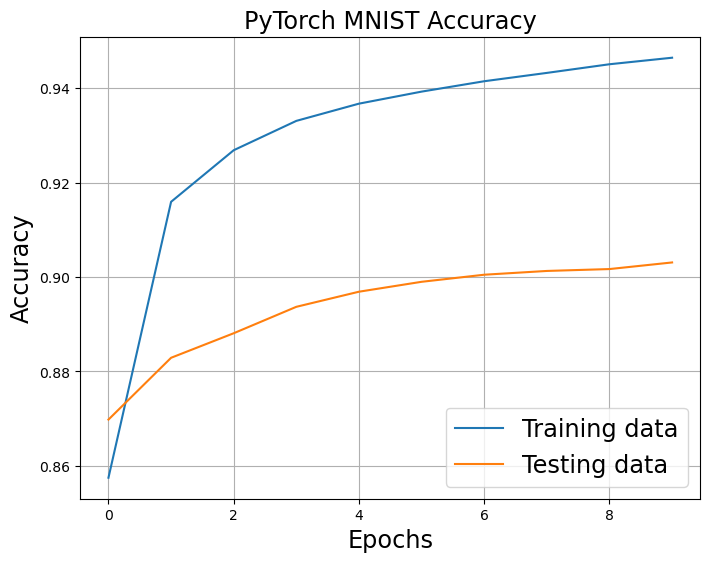

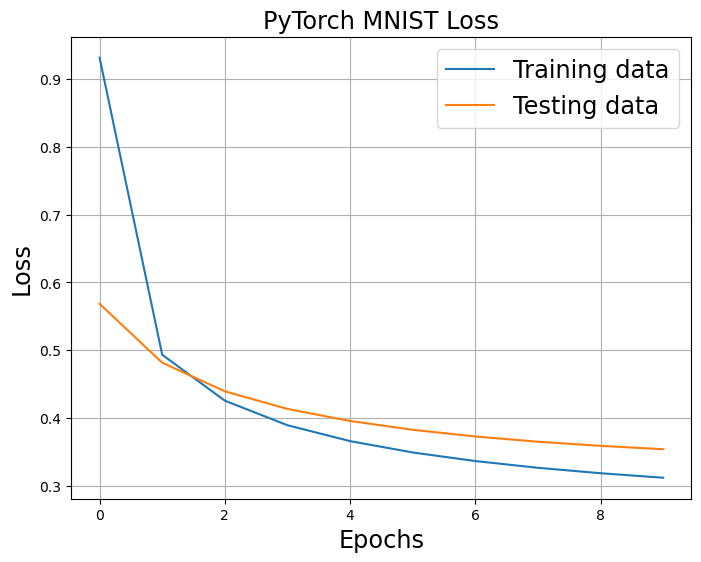

In [18]:
train_acc_list = []
test_acc_list = []

train_losses = []
test_losses = []


for epoch in range(10):
    torch.manual_seed(0)
    train_accu_number = 0.
    train_loss = 0.0
    
    for i_batch, sample_batched in enumerate(train_dataloader):
        inputs, labels = sample_batched
        inputs = inputs.reshape(-1, num_inputs)   # Add your comments (5 pts)
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=10)   # Add your comments (5 pts)
        
        pre_softmax = linear(inputs, W, b)
        prob_distr = softmax(pre_softmax)
        loss = cross_entropy(prob_distr, one_hot_labels)
        train_loss += torch.sum(loss).item()
        torch.sum(loss).backward()
        
        W.data -= lr*W.grad.data
        b.data -= lr*b.grad.data
        
        W.grad.zero_() # Add your comments (5 pts)
        b.grad.zero_()
        
        update_pre_softmax = linear(inputs, W, b)
        update_prob_distr = softmax(update_pre_softmax)
        train_predicted_class = to_classlabel(update_prob_distr)
        train_accu_number += torch.sum(train_predicted_class == labels)
    
    print(epoch,'training accuracy: %.4f' % (train_accu_number/len(train_dataloader.dataset)))
    train_acc_list.append(train_accu_number/len(train_dataloader.dataset))

    train_loss /= len(train_dataloader.dataset)  # Add your comments (5 pts)
    train_losses.append(train_loss)

    with torch.no_grad():
        test_loss = 0.
        test_accu_number = 0.
        for X, y in test_dataloader:
            X = X.reshape(-1, num_inputs)
            test_pre_softmax = linear(X, W,b)
            test_prob_distr = softmax(test_pre_softmax)
            one_hot_labels = torch.nn.functional.one_hot(y, num_classes=10)
            loss = cross_entropy(test_prob_distr, one_hot_labels)
            test_loss += torch.sum(loss).item()
            test_predicted_class = to_classlabel(test_prob_distr)
            test_accu_number += torch.sum(test_predicted_class == y)
        print(epoch,'testing accuracy: %.4f' % (test_accu_number/len(test_dataloader.dataset)))
        test_acc_list.append(test_accu_number/len(test_dataloader.dataset))
         
        test_loss /= len(test_dataloader.dataset)
        test_losses.append(test_loss)

plot(train_acc_list, test_acc_list, flag= True)   
plot(train_losses, test_losses, flag = False)

## Leverage `torch.nn.Sequential()`

### Define a simple model

Accuracy of the model on the train images: 89.47333526611328 %
Accuracy of the model on test images: 93.5999984741211 %
Accuracy of the model on the train images: 94.59833526611328 %
Accuracy of the model on test images: 95.19999694824219 %
Accuracy of the model on the train images: 95.97333526611328 %
Accuracy of the model on test images: 95.81999969482422 %
Accuracy of the model on the train images: 96.82499694824219 %
Accuracy of the model on test images: 96.23999786376953 %
Accuracy of the model on the train images: 97.41000366210938 %
Accuracy of the model on test images: 96.66000366210938 %
Accuracy of the model on the train images: 97.81500244140625 %
Accuracy of the model on test images: 97.02999877929688 %
Accuracy of the model on the train images: 98.12999725341797 %
Accuracy of the model on test images: 97.33999633789062 %
Accuracy of the model on the train images: 98.34666442871094 %
Accuracy of the model on test images: 97.2300033569336 %
Accuracy of the model on the train

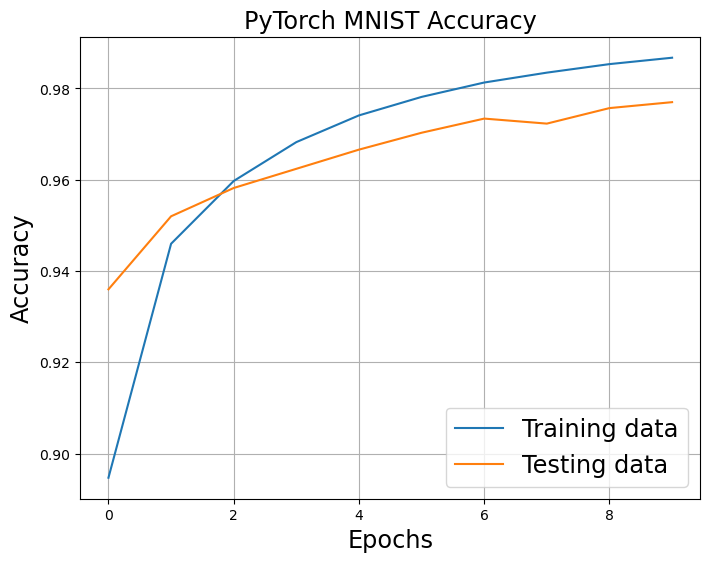

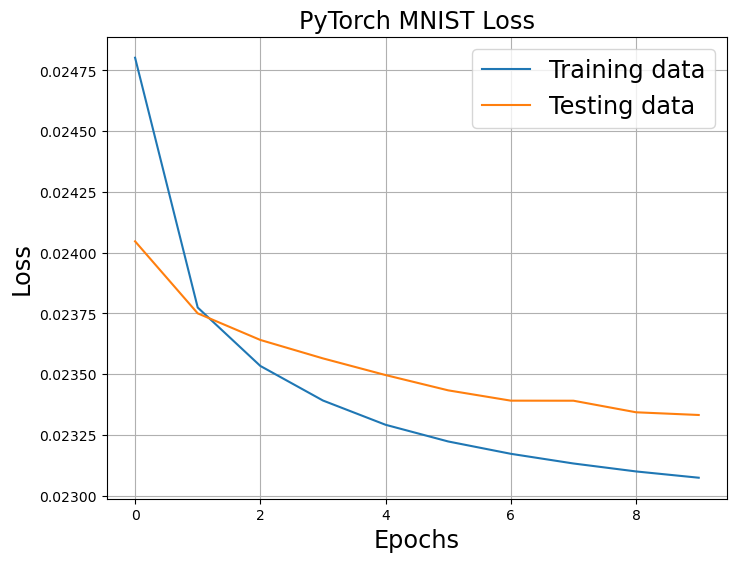

In [19]:
mlp = torch.nn.Sequential(  # Add your comments (5 pts)
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,10),
    torch.nn.Softmax(dim=1)
)

torch.manual_seed(42)

optimizer = torch.optim.Adam(mlp.parameters(), lr= 0.001)  # Add your comments (5 pts)
criterion = torch.nn.CrossEntropyLoss()  # Add your comments (5 pts)

train_acc_list = []
test_acc_list = []

train_losses = []
test_losses = []

for epoch in range(10):
    torch.manual_seed(42)
    
    train_loss = 0.
    train_correct= 0.
    train_total = 0.
    for i, (images, labels) in enumerate(train_dataloader):
        
        images = images.reshape(-1, 28 * 28)
        
        outputs = mlp(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        loss.backward() # Add your comments (5 pts)
        
        optimizer.step()  # Add your comments (5 pts)
        optimizer.zero_grad()   # Add your comments (5 pts)
    
        _, predicted = torch.max(outputs.data, 1)
        
        train_total += labels.size(0)
        train_correct += torch.sum(predicted == labels)
    
    print('Accuracy of the model on the train images: {} %'.format(100 * train_correct / train_total))
    train_acc_list.append(train_correct / train_total)
    train_loss /= train_total
    train_losses.append(train_loss)
    
    with torch.no_grad(): # Add your comments (5 pts)
        test_loss = 0.
        test_correct = 0.
        test_total = 0.
        for X, y in test_dataloader:
            X = X.reshape(-1, 28 * 28)
            y_pred = mlp(X)
            loss = criterion(y_pred, y)
            test_loss += loss.item()
            _, test_pred = torch.max(y_pred.data, 1)
            test_total += y.size(0)
            test_correct += torch.sum(test_pred == y)
        
    print('Accuracy of the model on test images: {} %'.format(100 * test_correct / test_total))
    test_acc_list.append(test_correct / test_total)  
    test_loss /= test_total
    test_losses.append(test_loss)

plot(train_acc_list, test_acc_list, flag= True)
plot(train_losses, test_losses, flag = False)

### Define a deep model if you like

Accuracy of the model on the train images: 43.900001525878906 %
Accuracy of the model on test images: 60.41999816894531 %
Accuracy of the model on the train images: 48.746665954589844 %
Accuracy of the model on test images: 48.84000015258789 %
Accuracy of the model on the train images: 58.53166580200195 %
Accuracy of the model on test images: 68.98999786376953 %
Accuracy of the model on the train images: 75.77666473388672 %
Accuracy of the model on test images: 79.70999908447266 %
Accuracy of the model on the train images: 79.61499786376953 %
Accuracy of the model on test images: 81.38999938964844 %
Accuracy of the model on the train images: 80.96333312988281 %
Accuracy of the model on test images: 82.27999877929688 %
Accuracy of the model on the train images: 81.72333526611328 %
Accuracy of the model on test images: 82.80000305175781 %
Accuracy of the model on the train images: 82.15833282470703 %
Accuracy of the model on test images: 83.0999984741211 %
Accuracy of the model on the tr

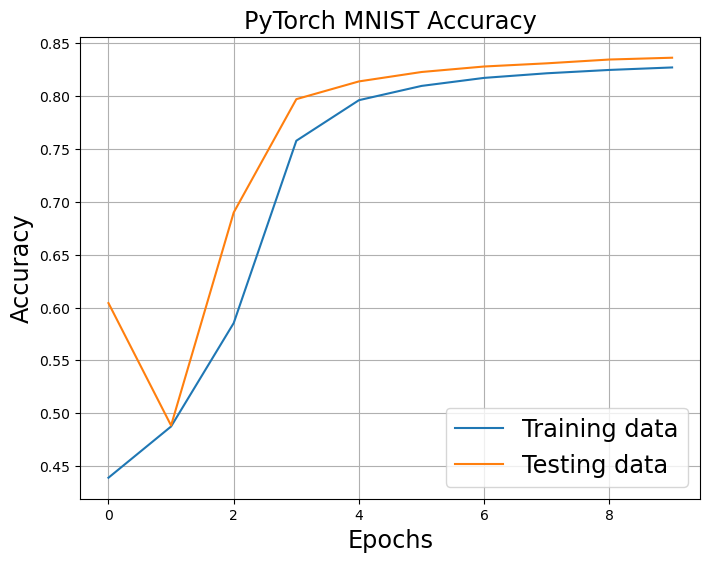

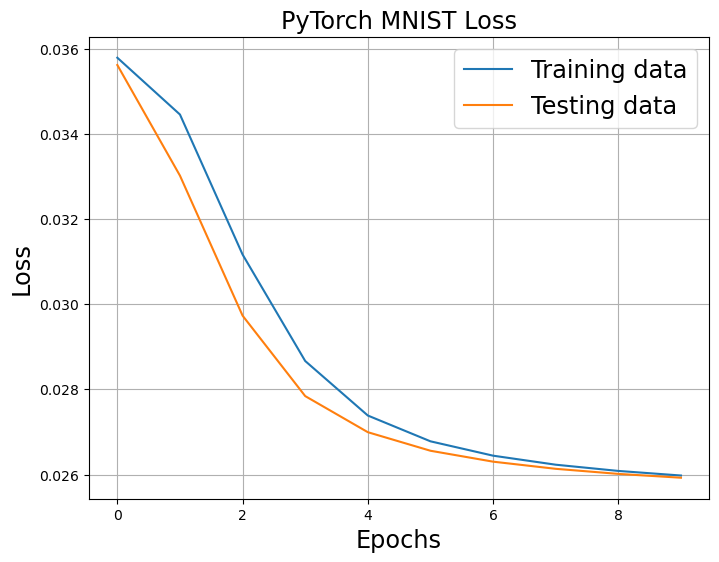

In [20]:
mlp = torch.nn.Sequential(  # Add your comments (5 pts)
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,10),
    torch.nn.Softmax(dim=1)
)

torch.manual_seed(42)

optimizer = torch.optim.SGD(mlp.parameters(), lr= 0.001,  momentum=0.9) # Add your comments (5 pts)
criterion = torch.nn.CrossEntropyLoss()

train_acc_list = []
test_acc_list = []

train_losses = []
test_losses = []

for epoch in range(10):
    torch.manual_seed(42)
    
    train_loss = 0.
    train_correct= 0.
    train_total = 0.
    for i, (images, labels) in enumerate(train_dataloader):
        
        images = images.reshape(-1, 28 * 28)

        outputs = mlp(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
          
        _, predicted = torch.max(outputs.data, 1)
        
        train_total += labels.size(0)
        train_correct += torch.sum(predicted == labels)
    
    print('Accuracy of the model on the train images: {} %'.format(100 * train_correct / train_total))
    train_acc_list.append(train_correct / train_total)
    train_loss /= train_total
    train_losses.append(train_loss)
    
    with torch.no_grad():
        test_correct = 0.
        test_loss = 0.0
        test_total = 0.
        for X, y in test_dataloader:
            X = X.reshape(-1, 28 * 28)
            y_pred = mlp(X)
            loss = criterion(y_pred, y)
            test_loss += loss.item()
            _, test_pred = torch.max(y_pred.data, 1)
            test_total += y.size(0)
            test_correct += torch.sum(test_pred == y)
        
    print('Accuracy of the model on test images: {} %'.format(100 * test_correct / test_total))
    test_acc_list.append(test_correct / test_total)  
    test_loss = test_loss / test_total
    test_losses.append(test_loss)

plot(train_acc_list, test_acc_list, flag= True) 
plot(train_losses, test_losses, flag = False)

## Modularize NN using `torch.nn.Module`

In [21]:
class MLP(nn.Module):   # Add your comments (5 pts)
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256,10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

torch.manual_seed(42)
# Define the loss function and optimizer
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Epoch 0: Train Loss: 0.016596, Test Loss: 0.006324, Accuracy: 8880/10000 (89%)
Epoch 1: Train Loss: 0.005637, Test Loss: 0.004781, Accuracy: 9115/10000 (91%)
Epoch 2: Train Loss: 0.004627, Test Loss: 0.004112, Accuracy: 9243/10000 (92%)
Epoch 3: Train Loss: 0.004021, Test Loss: 0.003619, Accuracy: 9328/10000 (93%)
Epoch 4: Train Loss: 0.003542, Test Loss: 0.003212, Accuracy: 9396/10000 (94%)
Epoch 5: Train Loss: 0.003147, Test Loss: 0.002875, Accuracy: 9463/10000 (95%)
Epoch 6: Train Loss: 0.002818, Test Loss: 0.002596, Accuracy: 9505/10000 (95%)
Epoch 7: Train Loss: 0.002540, Test Loss: 0.002367, Accuracy: 9549/10000 (95%)
Epoch 8: Train Loss: 0.002301, Test Loss: 0.002175, Accuracy: 9587/10000 (96%)
Epoch 9: Train Loss: 0.002095, Test Loss: 0.002013, Accuracy: 9613/10000 (96%)


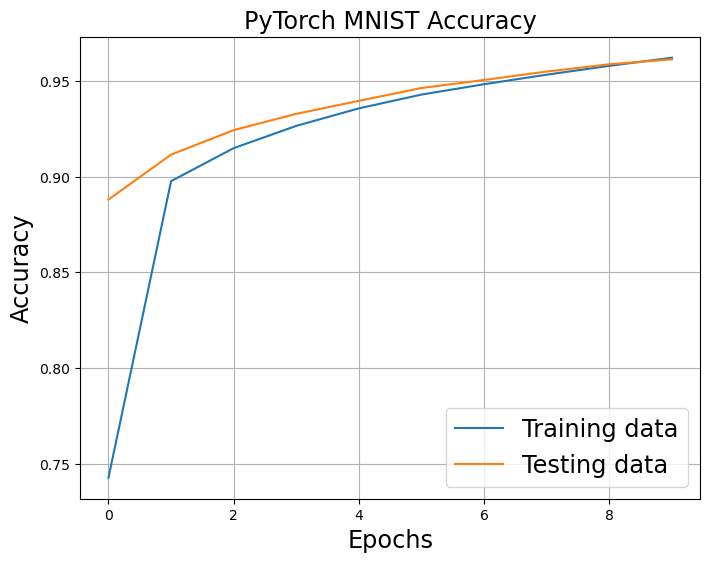

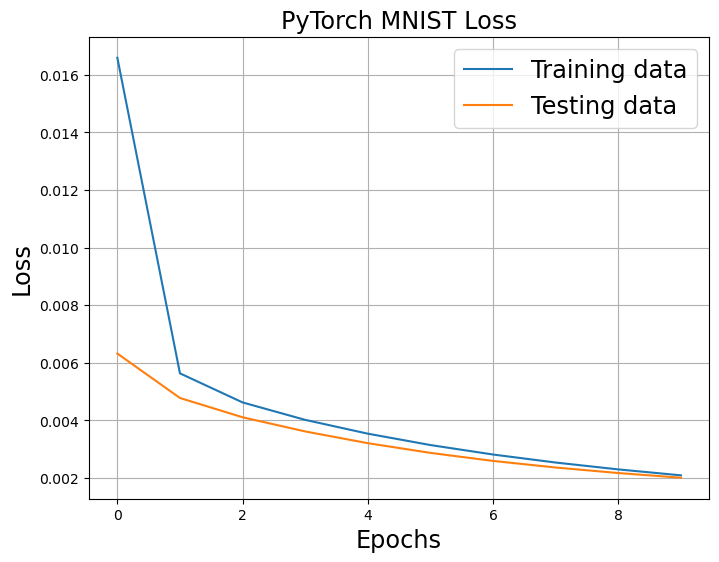

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)  # Add your comments (5 pts)


# Train the model
train_acc_list = []
test_acc_list = []

train_losses = []
test_losses = []
for epoch in range(10):
    # Training
    torch.manual_seed(42)
    model.train()
    train_total = 0. 
    train_correct = 0.
    train_loss = 0
    for data, target in train_dataloader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
    train_loss /= train_total
    train_losses.append(train_loss)
    train_acc_list.append(train_correct / train_total)

    # Evaluate the model on the test set
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_dataloader:
            images = images.reshape(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss = test_loss / test_total
    test_losses.append(test_loss)
    accuracy = 100 * test_correct / test_total
    test_acc_list.append(test_correct / test_total)
    print("Epoch {}: Train Loss: {:.6f}, Test Loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)".format(
        epoch, train_loss, test_loss, test_correct, test_total, accuracy))

plot(train_acc_list, test_acc_list, flag= True) 
plot(train_losses, test_losses, flag = False)